# Objectifs :
   #### Comprendre du mieux possible nos données
   #### Developper une prémiere stratégie de modélisation
    
# Checkliste de base

   ## Analyse de Forme
   #### Varible target: Diagnostique
   #### ligne e colonnes: 149, 22
   #### type de variable: Quantitatives: 21 , qualitagives: 1
   #### Analyse de valeur manquantes: 39% colone: diagnostique 
   
   ## Analyse de Fond
   ## Visualisation de la target
   
   #### Fievre Aphteuse  Peste Bovine  Tripanosomiase Bovine  Brucellose      18%
   #### Fievre Aphteuse                                                       12%
   #### Peste Bovine                                                          10%
   #### Peste Bovine  Brucellose                                              8%
   #### Fievre Aphteuse  Tripanosomiase Bovine                                6%
   #### Fievre Aphteuse  Peste Bovine  Brucellose                             6%
   #### Brucellose                                                            6%
   #### Fievre Aphteuse  Tripanosomiase Bovine  Brucellose                    5%
   #### Tripanosomiase Bovine                                                 5%
   #### Tripanosomiase Bovine  Brucellose                                     5%
   #### Fievre Aphteuse  Peste Bovine  Tripanosomiase Bovine                  4%
   #### Peste Bovine  Tripanosomiase Bovine                                   3%
   #### Peste Bovine  Tripanosomiase Bovine  Brucellose                       2%
   #### Fievre Aphteuse  Brucellose                                           2%
   #### Fievre Aphteuse  Peste Bovine                                         1%
   
   #### Signification des variables
   
   #### Relation variable target 
    
   

# Analyse de Forme des données

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix,make_scorer, recall_score ,f1_score, classification_report
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import random

# Import de la dataset 

In [49]:
data = pd.read_excel("dataset.xlsx")
data_copy = data.copy()

In [50]:
data.shape

(149, 22)

In [51]:
data.head()

,Fievre,Léthagie,Perte d'appétie,Ulcères buccaux,Cloque sur les pieds,Botierie,Toussotement,Diarrhée,Avortement,Anémie,...,Infertilité,Inflammation des articulations,Test Fievre Aphteuse,Test peste bovine,Test trypanosomiase,Test bruellose,Poids (kg),Temperature,Age,Diagnostique
0,1,0,1,0,0,1,0,1,1,1,...,1,0,0,1,1,1,184.69,32,2,Peste Bovine Tripanosomiase Bovine Brucellose
1,1,0,0,1,1,1,1,1,1,1,...,0,1,1,1,1,0,223.24,38,6,Fievre Aphteuse Peste Bovine Tripanosomiase ...
2,0,1,1,1,1,1,0,0,0,1,...,1,0,1,0,1,0,240.35,33,8,Fievre Aphteuse Tripanosomiase Bovine
3,1,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,126.57,38,3,NaN
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,126.98,34,7,Fievre Aphteuse Peste Bovine Tripanosomiase ...


<Axes: ylabel='count'>

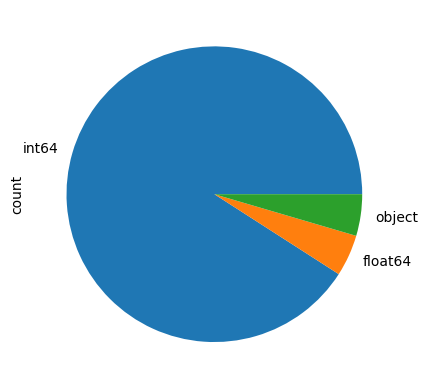

In [52]:
data_copy.dtypes.value_counts().plot.pie()

<Axes: >

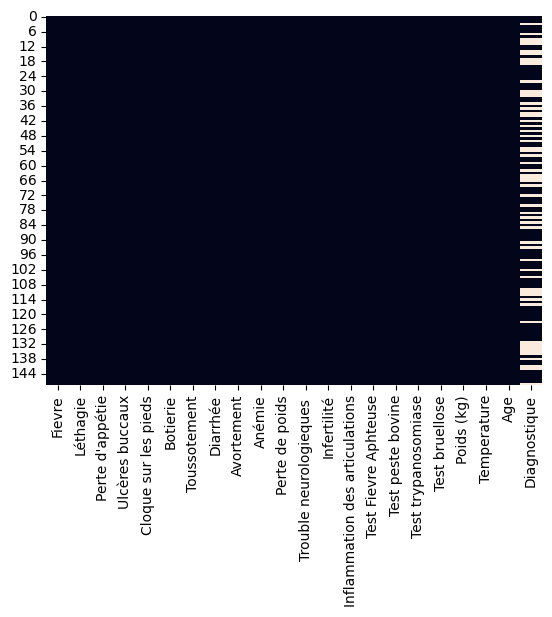

In [53]:

sns.heatmap(data_copy.isna() , cbar=False)

In [54]:
data_copy.isna().sum()/data_copy.shape[0]

Fievre                            0.000000
Léthagie                          0.000000
Perte d'appétie                   0.000000
Ulcères buccaux                   0.000000
Cloque sur les pieds              0.000000
Botierie                          0.000000
Toussotement                      0.000000
Diarrhée                          0.000000
Avortement                        0.000000
Anémie                            0.000000
Perte de poids                    0.000000
Trouble neurologieques            0.000000
Infertilité                       0.000000
Inflammation des articulations    0.000000
Test Fievre Aphteuse              0.000000
Test peste bovine                 0.000000
Test trypanosomiase               0.000000
Test bruellose                    0.000000
Poids (kg)                        0.000000
Temperature                       0.000000
Age                               0.000000
Diagnostique                      0.395973
dtype: float64

# Analyse de Forme

# Examination de la target

In [55]:
data_copy['Diagnostique'].value_counts(normalize=True)

Diagnostique
Fievre Aphteuse  Peste Bovine  Tripanosomiase Bovine  Brucellose      0.188889
Fievre Aphteuse                                                       0.122222
Peste Bovine                                                          0.100000
Peste Bovine  Brucellose                                              0.088889
Fievre Aphteuse  Tripanosomiase Bovine                                0.066667
Fievre Aphteuse  Peste Bovine  Brucellose                             0.066667
Brucellose                                                            0.066667
Fievre Aphteuse  Tripanosomiase Bovine  Brucellose                    0.055556
Tripanosomiase Bovine                                                 0.055556
Tripanosomiase Bovine  Brucellose                                     0.055556
Fievre Aphteuse  Peste Bovine  Tripanosomiase Bovine                  0.044444
Peste Bovine  Tripanosomiase Bovine                                   0.033333
Peste Bovine  Tripanosomiase Bovine  Br

# Histogrames des variables continues

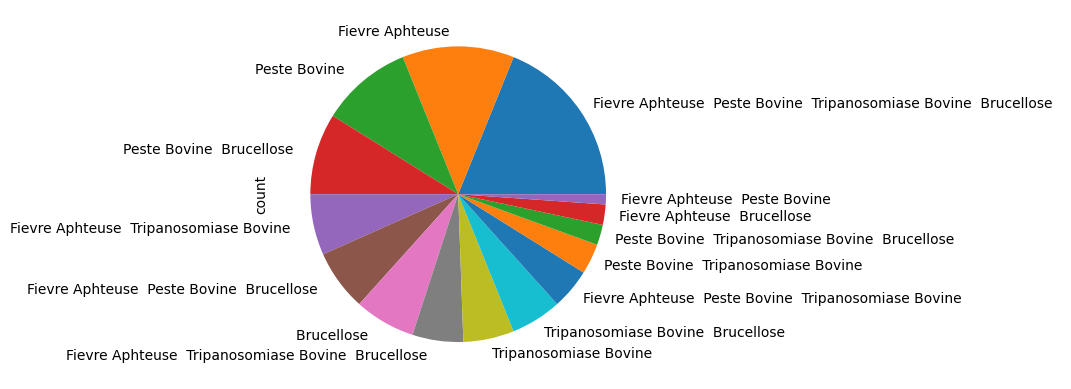

In [56]:
for c in data_copy.select_dtypes('object'):
    plt.figure()
    data_copy[c].value_counts().plot.pie()

# Visualisation de la target

In [57]:
data_copy['Diagnostique'].unique()

array(['Peste Bovine  Tripanosomiase Bovine  Brucellose  ',
       'Fievre Aphteuse  Peste Bovine  Tripanosomiase Bovine  ',
       'Fievre Aphteuse  Tripanosomiase Bovine  ', nan,
       'Fievre Aphteuse  Peste Bovine  Tripanosomiase Bovine  Brucellose  ',
       'Peste Bovine  Tripanosomiase Bovine  ',
       'Peste Bovine  Brucellose  ', 'Fievre Aphteuse  Peste Bovine  ',
       'Fievre Aphteuse  Peste Bovine  Brucellose  ', 'Brucellose  ',
       'Peste Bovine  ', 'Fievre Aphteuse  Brucellose  ',
       'Fievre Aphteuse  ',
       'Fievre Aphteuse  Tripanosomiase Bovine  Brucellose  ',
       'Tripanosomiase Bovine  ', 'Tripanosomiase Bovine  Brucellose  '],
      dtype=object)

# Relation Variable / Target

## Creation des sous ensemble malade et en_santé

In [58]:
malade = data_copy[data_copy['Diagnostique'].isna() != True]
en_sante = data_copy[data_copy['Diagnostique'].isna() == True]

# Target / variables entiere

/tmp/ipykernel_23577/635712908.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade[nom],label='Malade')
/tmp/ipykernel_23577/635712908.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(en_sante[nom],label='En santé')
/tmp/ipykernel_23577/635712908.py:3: UserWarning: 

`distplot` is a de

/tmp/ipykernel_23577/635712908.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(en_sante[nom],label='En santé')
/tmp/ipykernel_23577/635712908.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade[nom],label='Malade')
/tmp/ipykernel_23577/635712908.py:4: UserWarning: 

`distplot` is a de

/tmp/ipykernel_23577/635712908.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(en_sante[nom],label='En santé')
/home/zeck/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/tmp/ipykernel_23577/635712908.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histogram

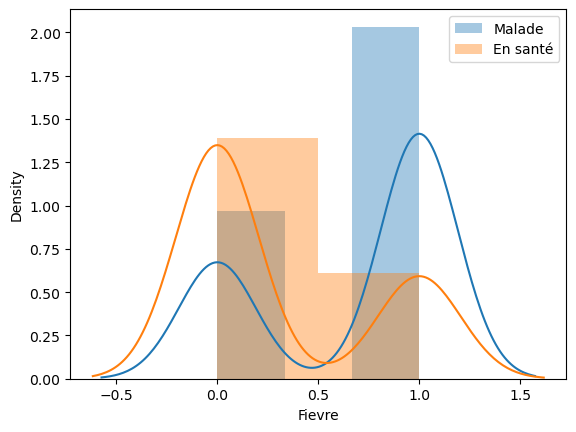

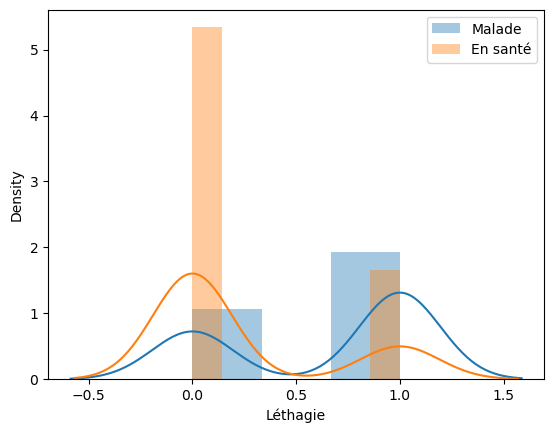

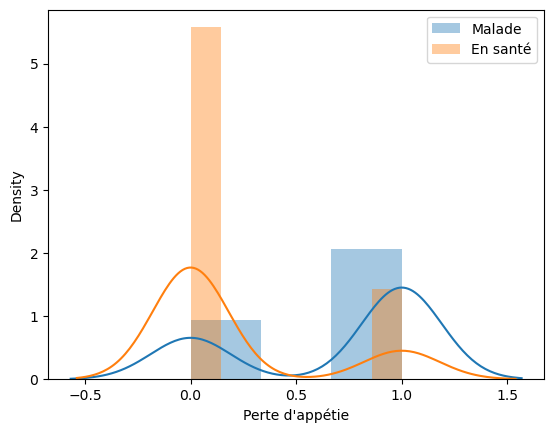

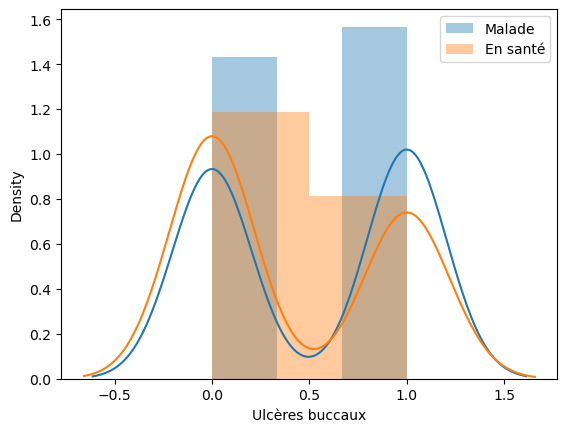

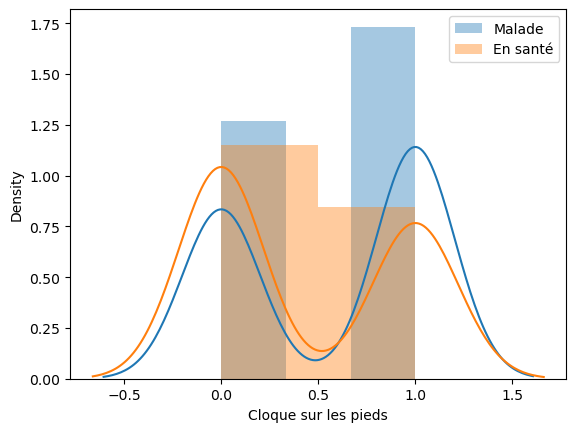

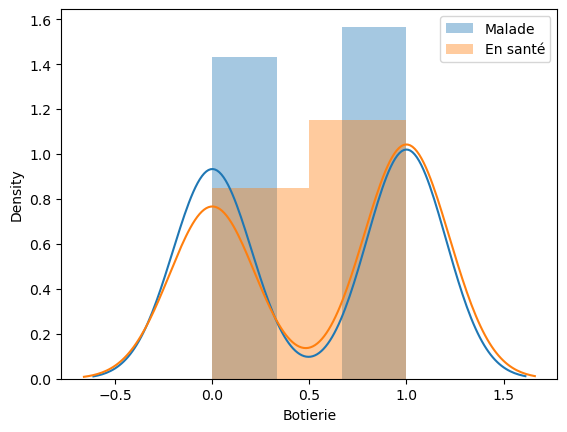

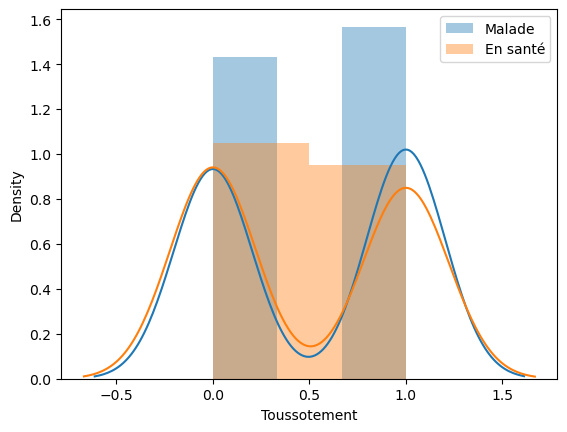

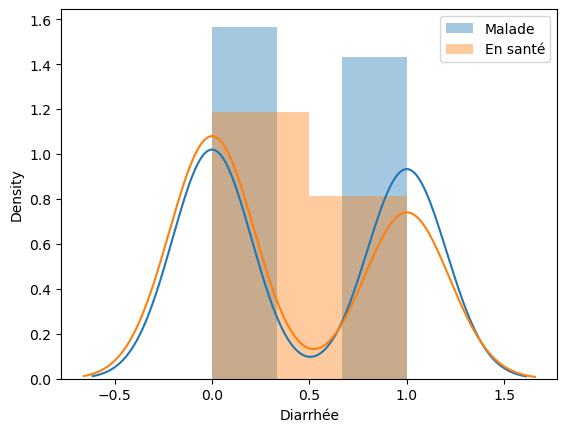

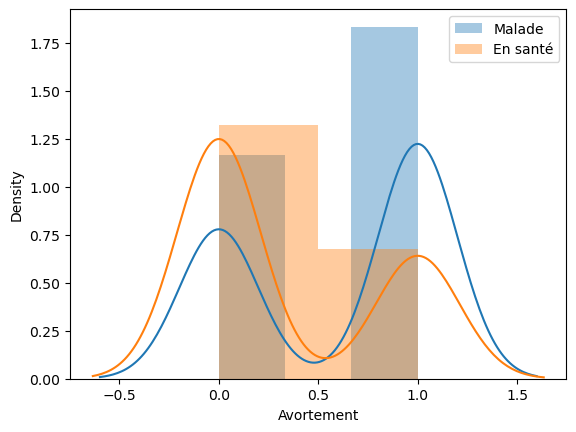

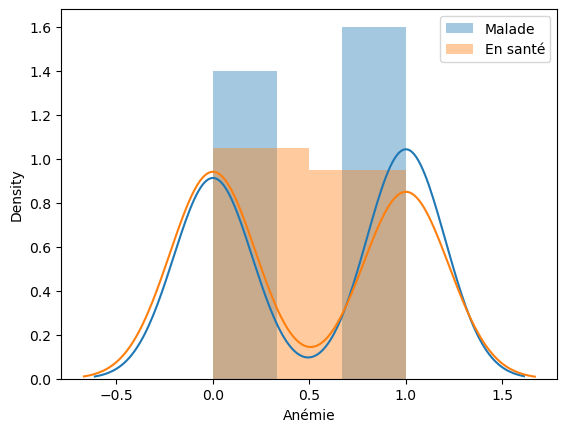

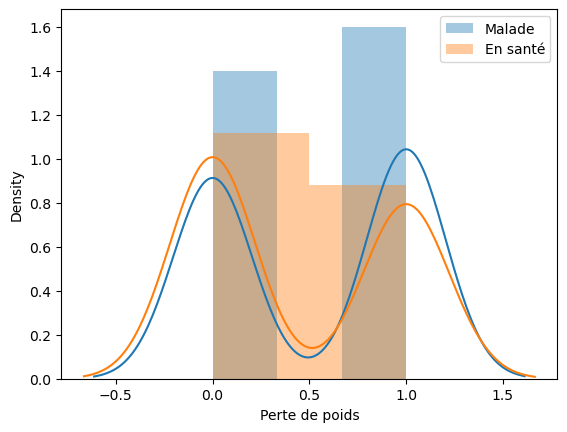

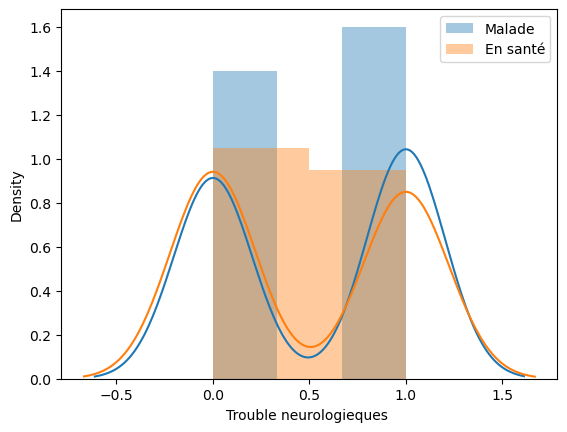

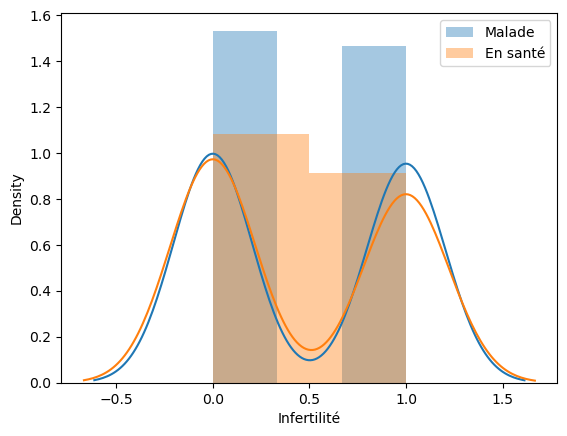

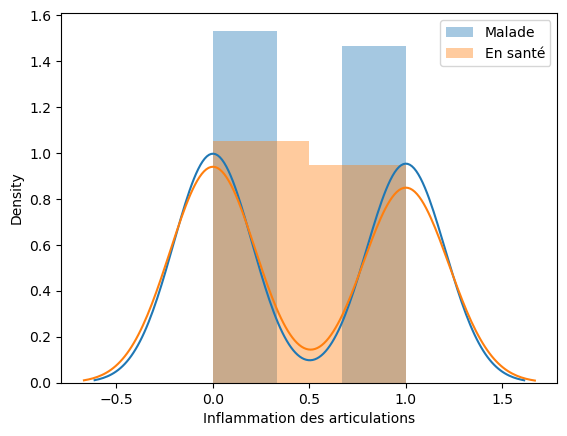

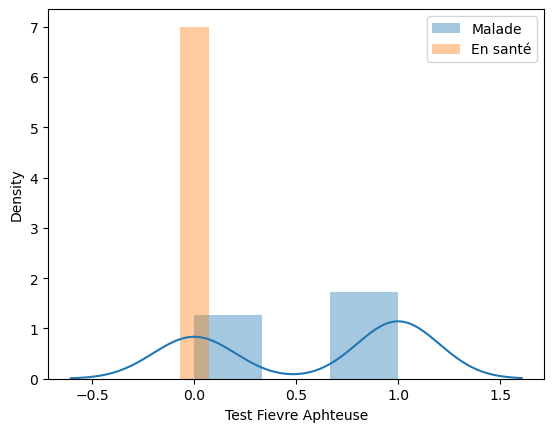

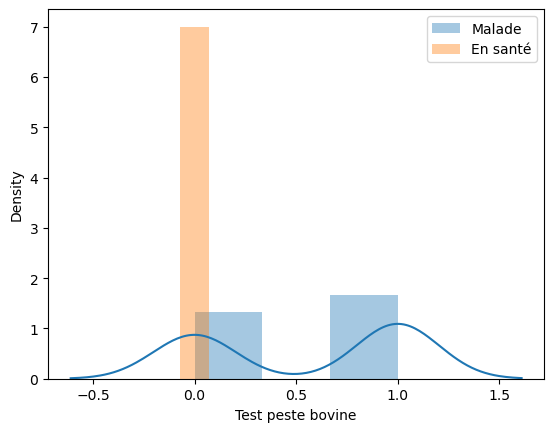

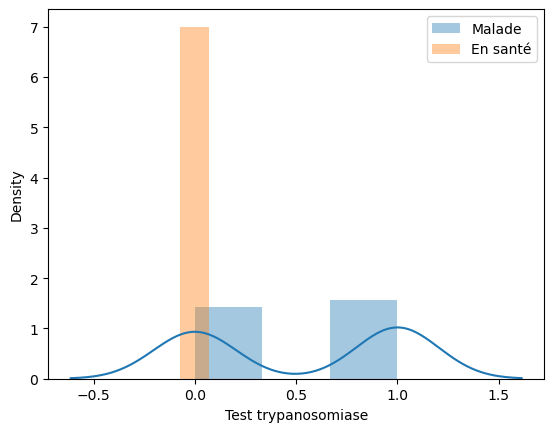

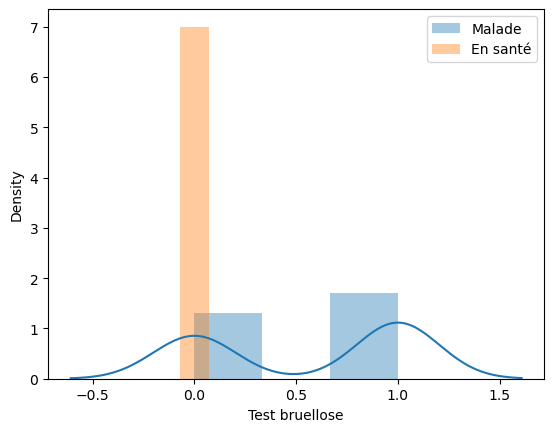

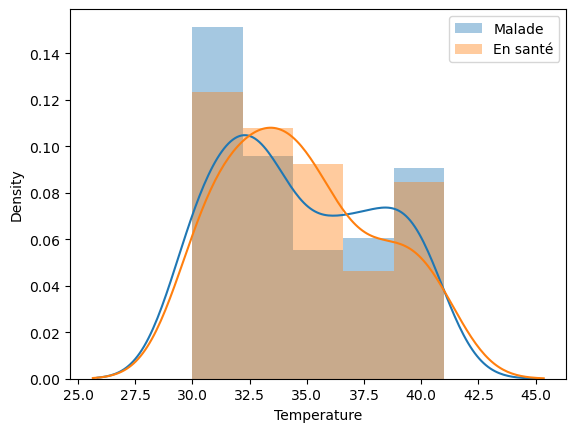

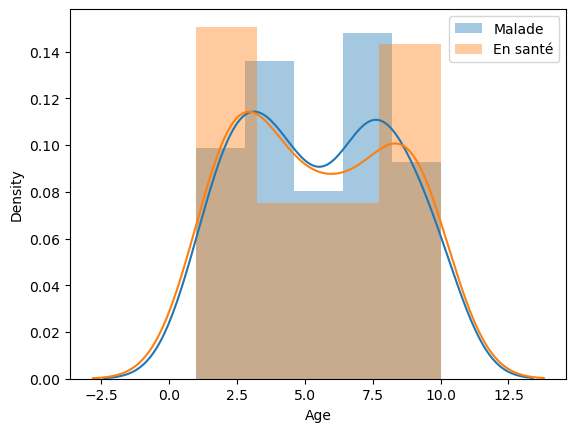

In [59]:
    for nom in data_copy.select_dtypes('int64'):
        plt.figure()
        sns.distplot(malade[nom],label='Malade')
        sns.distplot(en_sante[nom],label='En santé')
        plt.legend()

# Target / Poids

/tmp/ipykernel_23577/2604676400.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade['Poids (kg)'], label='Malade')
/tmp/ipykernel_23577/2604676400.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(en_sante['Poids (kg)'], label='En_santé')


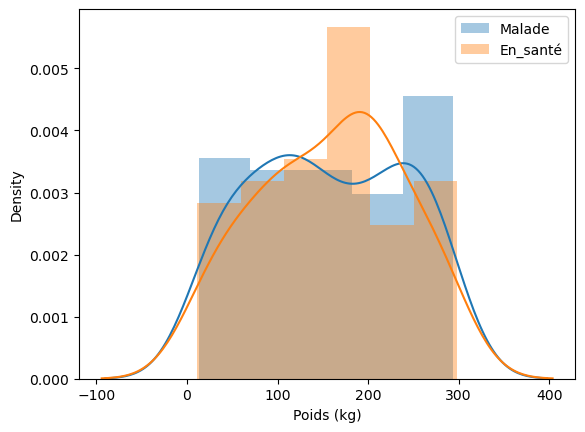

In [60]:
plt.figure()
sns.distplot(malade['Poids (kg)'], label='Malade')
sns.distplot(en_sante['Poids (kg)'], label='En_santé')
plt.legend()

# PRE-PROCESSSING

## Remplacer NaN par Bonne santé

In [75]:
# Duplication aléatoire des lignes existantes
data_augmented = data_copy.sample(frac=12, replace=True)

# Ajout de bruit gaussien aux colonnes numériques avec la moyenne actuelle
numeric_columns = data.select_dtypes(include=[np.number]).columns
data_augmented[numeric_columns] += np.random.normal(loc=0, scale=0.1, size=(len(data_augmented), len(numeric_columns)))

# Réinitialisez les index pour éviter des problèmes potentiels
data_augmented.reset_index(drop=True, inplace=True)


data_augmented['Diagnostique'] = data_augmented['Diagnostique'].fillna("Bonne santé ")
train_set , test_set = train_test_split(data_augmented, test_size=0.2, random_state=0) 
data_augmented.shape


(1788, 22)

<Axes: ylabel='count'>

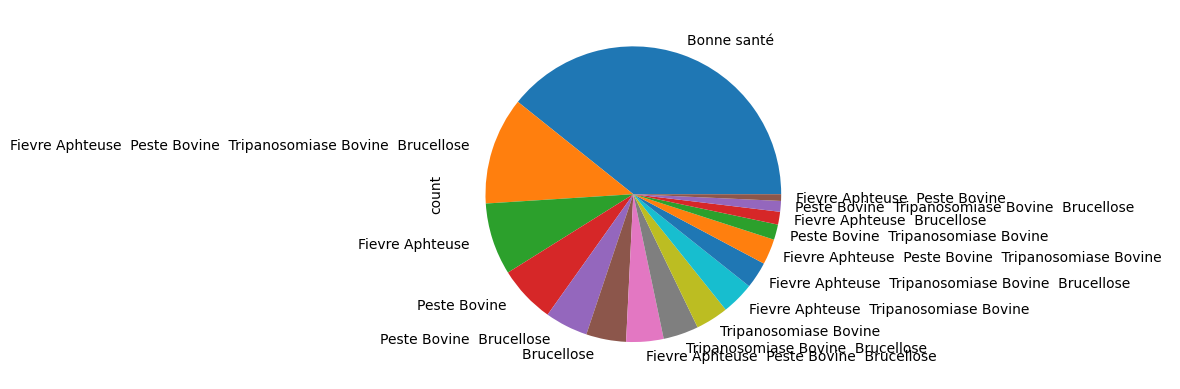

In [76]:
data_augmented['Diagnostique'].value_counts().plot.pie()

In [77]:
#train_set['Diagnostique'].value_counts().plot.pie()

In [78]:
#test_set['Diagnostique'].value_counts().plot.pie()

# Ecodage de differentes valeurs de la target

In [79]:
encoder = LabelEncoder()
encoder.fit_transform(data_copy['Diagnostique'])

array([12,  5,  7, 15,  6,  6, 11, 15, 10, 15, 15, 15, 10,  3, 15, 15,  4,
       15, 15, 15,  4,  6,  0,  9,  2, 10, 15,  6,  7,  5, 15, 15, 15,  6,
        1, 15,  1, 15,  6, 15, 15,  6, 15,  4, 15,  4, 15,  5, 15,  7, 15,
        4,  8, 15, 15,  8, 15,  6,  9, 15,  7,  6, 15,  1, 15, 15, 15,  8,
       15,  6, 10,  6, 15,  1,  0,  8, 15,  1,  0, 15,  6, 15,  1, 15,  9,
       15,  0, 13, 11,  1,  9, 15, 10, 15,  1, 14,  1,  2, 15,  6,  7, 13,
       15, 13,  9, 15, 14,  4, 14,  9, 15, 15, 15, 14, 15,  6, 15,  1,  9,
        1,  9,  9, 13, 15,  6, 10, 11,  8,  0, 13,  0, 15, 15, 15, 15, 15,
       15,  6, 15, 12, 14, 15, 15, 10, 10,  5,  7,  6, 15])

In [80]:
def preproessing(data_copy):
    
    x = data_copy.drop('Diagnostique',axis=1)
    y = encoder.fit_transform(data_copy['Diagnostique'])
    return x, y

In [81]:
x_train , y_train = preproessing(train_set)
x_test, y_test = preproessing(test_set)

# Modelisation

In [82]:
model = DecisionTreeClassifier(random_state=0)

In [83]:
for depth in range(1,15):
    model1 = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(model1,x_train,y_train,cv = 5)
    print(f"profondeur {depth}: Precision Moyenne = {scores.mean()}")
        

profondeur 1: Precision Moyenne = 0.5104895104895104
profondeur 2: Precision Moyenne = 0.6552447552447551
profondeur 3: Precision Moyenne = 0.8188811188811188
profondeur 4: Precision Moyenne = 0.9993006993006993
profondeur 5: Precision Moyenne = 0.9993006993006993
profondeur 6: Precision Moyenne = 0.9993006993006993
profondeur 7: Precision Moyenne = 0.9993006993006993
profondeur 8: Precision Moyenne = 0.9993006993006993
profondeur 9: Precision Moyenne = 0.9993006993006993
profondeur 10: Precision Moyenne = 0.9993006993006993
profondeur 11: Precision Moyenne = 0.9993006993006993
profondeur 12: Precision Moyenne = 0.9993006993006993
profondeur 13: Precision Moyenne = 0.9993006993006993
profondeur 14: Precision Moyenne = 0.9993006993006993


In [91]:
best_depth = 4
final_model = DecisionTreeClassifier(max_depth=best_depth)
final_model.fit(x_train,y_train)

final_model.score(x_test,y_test)

1.0

# Procédure d'évaluation

In [92]:


def evaluation(model):
        
    final_model.fit(x_train, y_train)
    print(final_model.score(x_test,y_test))
    predition = final_model.predict(x_test)
    
    print(confusion_matrix(y_test , predition))
    print(classification_report(y_test , predition))
    v = StratifiedKFold(n_splits=4)
    #Learning curve: UTILENT POUR COMPRENDRE SI NORTE MODEL EST EN OVER OU UNDER FITING
    #Comme nos targets ne sont pas binaire on utilisera: make_score avec une average='micro' ou 'macro'
    N, train_score, val_score = learning_curve(final_model, x_train, y_train, 
                                               cv=v,scoring=make_scorer(f1_score, average='micro'), 
                                               train_sizes = np.linspace(0.1, 1, 10))
    #plt.figure(figsize=(12,8))
    plt.figure()
    plt.plot(N, train_score.mean(axis=1), label = "train score")
    plt.plot(N, val_score.mean(axis=1), label = "validation score")
    plt.title("Enrtrainement et test de validation")
    plt.legend()
    
    #Capture des erreurs
    error_train = 1 - train_score.mean(axis = 1)
    error_val = 1 - val_score.mean(axis = 1)
    
    plt.figure()
    plt.plot(N, error_train, label="Erreur d'enrtrainement", c='green')
    plt.plot(N, error_val, label="Erreur de validation", c='red')
    plt.title("Erreur d'enrtrainement et de validation")
    plt.legend()
    
    plt.figure()
    sns.heatmap(confusion_matrix(y_test , predition), annot=True, fmt='d', cmap='Greens', xticklabels=['Bonne santé ', 'Peste Bovine', ''], yticklabels=['Class 0', 'Class 1', 'Class 2'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


1.0
[[142   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  16   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  22   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   4   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  20   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   8   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  39   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  12   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  24   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  17   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   5   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 

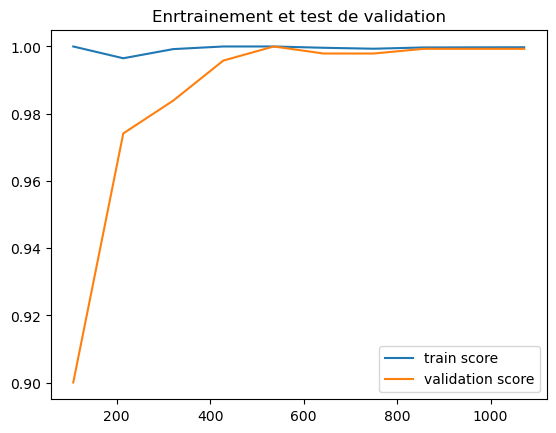

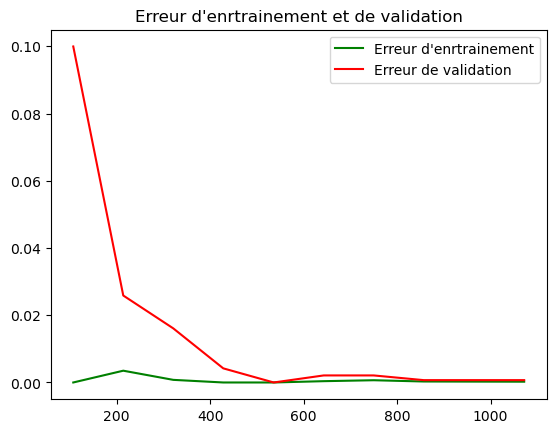

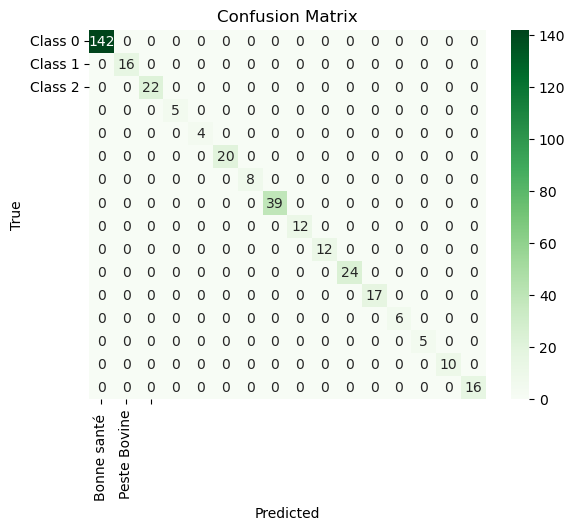

In [93]:
evaluation(final_model)

In [161]:
code = {
    'Fievre Aphteuse  Peste Bovine  Tripanosomiase Bovine  Brucellose':1,
    'Fievre Aphteuse': 2,
    'Peste Bovine  Brucellose': 3,
    'Fievre Aphteuse  Tripanosomiase Bovine': 4,
    'Brucellose': 5,
    'Tripanosomiase Bovine': 6,
    'Fievre Aphteuse  Tripanosomiase Bovine  Brucellose': 7,
    'Peste Bovine': 8,
    'Fievre Aphteuse  Peste Bovine  Tripanosomiase Bovine': 9,
    'Fievre Aphteuse  Peste Bovine  Brucellose': 10,
    'Tripanosomiase Bovine  Brucellose': 11,
    'Peste Bovine  Tripanosomiase Bovine': 12,
    'Peste Bovine  Tripanosomiase Bovine  Brucellose': 13,
    'Fievre Aphteuse  Brucellose': 14,
    'Fievre Aphteuse  Peste Bovine': 15,
    'Bonne santé':0
}

# Utilisation du model

In [163]:
def complet_data(info_bovin :list):
    i =3
    s=info_bovin[0] + info_bovin[1] + info_bovin[2]
    s1,s2,s3,s4 = s,s,s,s
    while (i<14):
        if(i<6):
            s1 += info_bovin[i]
        if ( i>=6 and i<9 ):
            s2 += info_bovin[i]
        if(i>=9 and i<12):
             s3 += info_bovin[i]
        if i==8 or (i>=12 and i<14):
             s4 += info_bovin[i]
        i += 1
    if s1>= 4:
        info_bovin.insert(14,1)
    else:
        info_bovin.insert(14,0)
    if s2>= 4:
        info_bovin.insert(15,1)
    else:
        info_bovin.insert(15,0)
    if s3>= 4:
        info_bovin.insert(16,1)
    else:
        info_bovin.insert(16,0)
    if s4>= 4:
        info_bovin.insert(17,1)
    else:
        info_bovin.insert(17,0)
    return np.array(info_bovin).reshape(1,21)

In [166]:
def diagnostic(list_info_bovin):
    predition = final_model.predict(list_info_bovin)
    result = encoder.inverse_transform(predition)
    return result

In [167]:
    print(" ---------------------------------Bienvenue ---------------------------------".upper())
    print("\n              Merci d'utiliser notre programme de diagnostic. \n\n".upper())
    
    list_symptome = ["Fievre","Léthagie","Perte d'appétie","Ulcères buccaux","Cloque sur les pieds","Botierie","Toussotement","Diarrhée","Avortement","Anémie","pertes de poids","trouble neurologique","Infertilité","Inflammation des articulations"]
    symptome = []
    quest = "votre animal souffre t il de "
    print("\033[1m Entrer les symptomes remarquer chez votre animale: \033[0m\n")
    
    for nb_question in range(14):
        print(quest + "\033[1m" + list_symptome[nb_question] + "\033[0m" + "?:(O/N)")
        rep= input()
        
        if (rep == "O" or rep == "o" ):
            symptome.append(1)
        else:
            symptome.append(0)
            
    print("\033[1m \n\nEtat physiologique du bovin: \n \033[0m")
    print("entrer le \033[1mpoids\033[0m de votre bovins:")
    symptome.append(float(input()))
    print("entrer la\033[1m temperature\033[0m de votre bovins:")
    symptome.append(int(input()))
    print("entrer \033[1ml'age\033[0m de votre bovins:")
    symptome.append(int(input()))
    
    
    resultDianostic = diagnostic(complet_data(symptome))[0].strip()
    if(resultDianostic == "Bonne santé"):
        print(f"\n\033[1m Votre bovin est en \033[42m {resultDianostic}\033[0m. Aucune maladie n'a été détectée.\n\n")
    else:
        print(f"\n\033[1m Votre bovin présente des symptômes indiquant \033[31m{resultDianostic}\033[0m.\n Il est recommandé de consulter un vétérinaire.\n\n")
        

 ---------------------------------BIENVENUE ---------------------------------

              MERCI D'UTILISER NOTRE PROGRAMME DE DIAGNOSTIC. 


 Entrer les symptomes remarquer chez votre animale: 

votre animal souffre t il de Fievre?:(O/N)


KeyboardInterrupt: Interrupted by user